[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Measures%20of%20Association/Python/Linear%20Regression.ipynb)

# Definitions

Linear regression is a common way to measure associations between a dependent, measured random variable ($Y$) and a set of independent predictors ($X$).

**Simple linear regression** uses just one predictor:

$\quad y_i=\beta_0+\beta_1x_1+\epsilon_i$

where $\beta_0$ and $\beta_1$ are the "beta weights" describing the y-intercept and slope, respectively, of the line describing the relationship between $X$ and $Y$, and $\epsilon_i$ tells us that the relationship is noisy (more specifically, that the measured linear relationship is corrupted by additive Gaussian noise).

**Multiple linear regression** uses multiple predictors:

$\quad y_i=\beta_0+\beta_1x_1+\beta_2x_2\:+ ... +\:\epsilon_i$

**General linear models**, which we will not consider further here, are even more general and allow the value of $Y$ to be a vector and not just a scalar on each trial.

We typically use linear regression to do any or all of the following:

1\. Infer if a measured variable $Y$ is associated with another variable (predictor) of set of variables (predictors) $X$. This is a hypothesis test. For example, to test if there is a positive relationship between two variables: as you are given more ice cream to eat ($X$ variable), does your body weight ($Y$ variable) change (increase or decrease)? A *p*-value can be assigned to this association; more below on this.

2\. What is the strength of the association? How tightly are these two variables associated? A positive beta weight implies a positive relationship (both go up/down at the same time), whereas a negative value implies a negative relationship (they go in opposite directions).

It is critical to remember that unlike a correlation coefficient, whose magnitude always varies between -1 and 1 independently of the magnitude of the quantities being correlated, in linear regression the magnitude of any given beta weight depends critically on the units and magnitudes of the quantities used in the regression. Therefore, comparing beta weights from two different regressions (or even from different terms in the same multiple linear regression equation, if the predictors are not independent!) is not always straightforward, as discussed [here](http://www.glmj.org/archives/articles/Ziglari_v43n2.pdf).

One way around this problem is to use standardized linear regression, in which the same linear model is used but applied to standardized variables. That is, each of the independent and dependent variables are converted in units of z-score: subtract the sample mean and divide by the sample standard deviation.

3\. The equation that describes the relationship can be used to predict unknown values. That is, once the values of the betas in the above equations are known, they can be used with new values of the independent variables to predict the value of the dependent variable under those conditions.

There are some assumptions in order to use linear regression. For example, for any value of $X$ there exists a normal distribution of $Y$ values, and the relationship between $X$ and $Y$ is linear. Make sure that you always look at your data first (e.g., in scatterplots) to get a first-pass impression if these assumptions are reasonable.

# Calculating the slope of the regression line and its intercept

The **slope** $b=\frac{\sum{X_iY_i-\frac{\sum{X_i}\sum{Y_i}}{n}}}{\sum{X^2_i-\frac{(\sum{X_i})^2}{n}}}$, where *i* is the individual values of $X$ an $Y$ and *n* is the number of observations.  This calculation is the best fit or best estimate of the slope, given your measurements. It is best in the sense that it tries to minimize the distance (in a least squares sense) between $Y_{pred}$ and all $Y_i$.

The **intercept** $a=Y_{avg} - bX_{avg}$, where $Y_{avg}$ and $X_{avg}$ are the average values of $X$ and $Y$.

# Null hypotheses for linear regression


For the slope, this test can be conceptualized in two ways:

1\. $H_0: b=0$. Here an [analysis of variance](https://colab.research.google.com/drive/1wPjM-On_ktPzcV4xv5iP5nW8t0IPBWz1?usp=sharing) and an *F*-statistic ($df=n-2$) is used to support or refute the null hypothesis.

2\. (More general) $H_0:b=b_0$, where $b_0$ can be any value. Here, a 2-tailed [*t*-test](https://colab.research.google.com/drive/1M7xjaMwJUEyULPHfXc3tWG6-WVjCl-uQ?usp=sharing) can be used to test the null hypothesis. 1-tailed *t*-tests can also be used to test null hypotheses such as $H_0:b≤0$ or $H_0:b≥0$.



# Confidence intervals in linear regression

Confidence intervals in linear regression are based on the standard errors of the estimates of the regression parameters and can be computed using the [*t* distribution](https://colab.research.google.com/drive/1Q_Du5NK71Rc1qu-byh8dy8Fs39uvR_4n?usp=sharing):

For the slope, the $100(1-\alpha)$ confidence interval is defined as:

$\quad b\pm t_{\alpha/2,n-2}\times\sqrt{\frac{MSE}{\sum(x_i-\bar{x})^2}}$, where MSE is the mean squared error [defined in the ANOVA tutorial](https://colab.research.google.com/drive/1wPjM-On_ktPzcV4xv5iP5nW8t0IPBWz1?usp=sharing).

For the intercept, the $100(1-\alpha)$ confidence interval is defined as:

$\quad a\pm t_{\alpha/2,n-2}\times\sqrt{\frac{MSE}{n}}$.

# Sample size and power

Like with all experiments, it is always a good idea to get a sense of how much data you will need to reject $H_0$. See [here](https://colab.research.google.com/drive/1wTKRgKK5eDUya7FZRHeu1RaoY7kuhiGi?usp=sharing) for how to perform a power analysis using a *t*-test.

# Getting started with code

Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Measures of Association/ParametricCorrelation.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from operator import add

# Neuroscience Examples

## Example 1: London Taxi Drivers

Perhaps one of the more famous early studies using MRI and fMRI to relate behavior to underlying neuroanatomy are the studies that looked at relationships between experience as a taxi-cab drivers in London and hippocampus size. In [the first study](https://www.pnas.org/content/97/8/4398), they found a correlation between hippocampal size (in the posterior region]) and time as a taxi-cab driver. In London, taxi drivers have to take a test showing their knowledge of the streets of London. Here is one of their key findings:

![](https://drive.google.com/uc?export=view&id=1ozXY-A4yvF8NNgY6jwD8ZuiIjsjQwYjZ)

**Legend**: The volume of gray matter in the right hippocampus was found to correlate significantly with the amount of time spent learning to be and practicing as a licensed London taxi driver, positively in the right posterior hippocampus.

Without getting into details of the science itself, do you think a liner regression is a proper way to analyze this data set? Are the data linear? Why or why not? If not, how does that weaken any interpretation of the data?

In a [follow-up study](https://onlinelibrary.wiley.com/doi/epdf/10.1002/hipo.20233), they compared taxi cab drivers with bus drivers and found a correlation between years of driving experience and hippocampal size for the taxi cab drivers but not for the bus drivers. They argued that the basis for these results is the observation that bus drivers drive the same route everyday, whereas taxi cab drivers have to know the entire city and be flexible in how they navigate the city. Can one make any sort of inference about casualty from this finding? What are the weaknesses and strengths of such a study and set of findings? 



## Example 2: Musical Brains

Here is [another example](http://www.brainmusic.org/EducationalActivities/Pantev_musicians1998.pdf), in which a group of scientists attempt to relate behavioral function with changes in underlying neuroanatomy. This is not bad, mind you, but fraught with complexities. In this study, they studied how musical information was represented in the brains of musicians with perfect (absolute) pitch (i.e.,  can recognize a note or reproduce a note without any reference note) or relative pitch (need a reference note) and a control group. Here is their first figure: 

![](https://drive.google.com/uc?export=view&id=18C36zvXPjZ7_wk04IMD9OshVQTrAW1nB)

In panel b, they plot the correlation between frequency and region of brain activation or each of the 3 groups. This correlation is done for pure tones (panel a, left; like those produced by a tuning fork) and for piano notes (panel a, right). What do you think of their *n*? How strong of a claim do you think they can make with their regression based on their *n*? What would their confidence intervals look like? In each plot, there are 2 regression lines. In theory, can you think of a way to  decide if the two regression lines are the same or not? What would be your $H_0$? 

Here is their second figure:

![](https://drive.google.com/uc?export=view&id=1QW773k_M3U_mWk1aMrtvZ1hULpwPARW0)

Panel b is like the taxi-cab paper in which they correlate musical experience (age in which they started playing an instrument) with a measure of brain activation (the higher the mean dipole moment, the more the neurons are nominally activated). Ignoring the two types of musicians, what is the take-home message from the graph? Is it ok to treat both sets of musicians as one group? What assumptions would you have to make? What tests do you think you should do(qualitatively speaking)? Do you think you should report (if this was your paper] the regression between moment and the two groups separately? 

# Exercises

Using the following data set to investigate the relationship between Age and Wing Length, and use the data to generate answers to the prompts below:

Age	| Wing Length
-- | --
3	| 1.4
4	| 1.5
5	| 2.2
6	| 2.4
7	| 3.1
8	| 3.2
9	| 3.2
11	| 3.9
12	| 4.1
14	| 4.7
15	| 4.5
16	| 5.2
17 | 5.0


##### 1\. Plot the relationship between Age and Wing Length.

Text(0, 0.5, 'Wing Length (cm)')

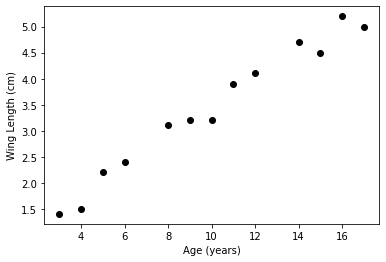

In [2]:
# Always run this cell to load the data
# The data: wing lengths of 13 birds at different ages
age=[3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17] # the X variable
wing_length=[1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5] # the Y variable

# Plot the data
plt.plot(age, wing_length, 'ko')
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')

##### 2\. Calculate and plot the regression line.

slope = 0.27 computed, 0.27 built-in
intercept = 0.71 computed, 0.71 built in


Text(0.5, 1.0, '$WingLength_{pred}$ = 0.71 + 0.27 Age')

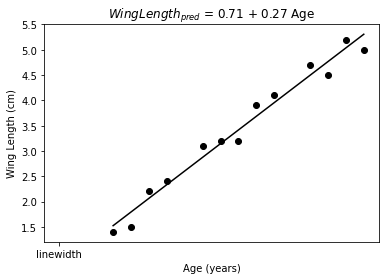

In [3]:
# Computing regession line predicted_wing_length = a + b * age.
n=len(age) # alternatively, you can calculate n=len(wing_length)
SumX=np.sum(age) # sum up all X values
MeanX=np.mean(age) # find the mean X value
SumX2=np.sum(np.square(age))  # the sum of each X squared
Sumx2=SumX2-np.square(SumX)/n  # the sum of the square of the difference between (each X and mean X);

SumY=np.sum(wing_length) #sum up all Y values
MeanY=np.mean(wing_length) # find the mean Y value
SumXY=np.inner(age, wing_length) # the sum of the product of each X and Y values
Sumxy=SumXY-SumX*SumY/n # the sum of the product of the difference between each X value minus the
SumY2=np.sum(np.square(wing_length)) # the sum of each Y squared

# SLOPE
b=Sumxy/Sumx2

# INTERCEPT
a=MeanY-b*MeanX

# Check against built-in function
coefs = np.polyfit(age, wing_length, 1)
print(f'slope = {b:.2f} computed, {coefs[0]:.2f} built-in')
print(f'intercept = {a:.2f} computed, {coefs[1]:.2f} built in')

# Add the regression line to the plot
plt.plot(age, wing_length, 'ko')
xax = [age[0], age[-1]]
plt.plot(xax, [b*x for x in xax]+a,'k-','linewidth',2)
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.title(f'$WingLength_{{pred}}$ = {a:.2f} + {b:.2f} Age')


##### 3\. Can you reject $H_0:b=0$?

In [4]:
# Using an F-test
k = 2 # number of groups
ndf = k-1 # numerator degrees of freedom
ddf= n-k #  denominator degrees of freedom
totalSS=SumY2-SumY**2/n # totalSS is essentially the sum of the square of the difference between (each y and mean Y);
regressionSS=Sumxy**2/Sumx2
residualSS=totalSS-regressionSS
Fstat=regressionSS/(residualSS/ddf)
prob=1-st.f.cdf(Fstat,ndf,ddf) # significance probability for regression
print(f'p(Fstat) of H_0:b=0 = {prob:E}')

# Using a t-test
#syx=np.sqrt((residualSS/ddf));
sb=np.sqrt(residualSS/ddf/Sumx2) # sb is essentially the standard error of the regression slope
Tval=(b-0)/sb;
prob = 1-st.t.cdf(Tval,ddf) # degrees of freedom is n-k
print(f'p(Tstat) of H_0:b=0 = {prob:}')

p(Fstat) of H_0:b=0 = 5.267053E-10
p(Tstat) of H_0:b=0 = 2.633526730022595e-10


##### 4\. Calculate and plot the confidence intervals on the slope of the regression.

Text(4, 4.2, '95% CI in red dashed lines')

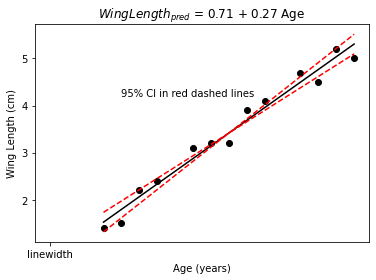

In [5]:
alpha = 0.05;
t=-1*st.t.ppf(alpha/2,ddf) # ddf is the degrees of freedom
b05=b-t*sb # lower CI
b95=b+t*sb # upper CI
a05=MeanY-b05*MeanX # intercept for lower CI
a95=MeanY-b95*MeanX # intercept for upper CI

# Add the regression line to the plot
plt.plot(age, wing_length, 'ko')
plt.plot(xax, [b*x for x in xax]+a,'k-','linewidth',2)
plt.xlabel('Age (years)')
plt.ylabel('Wing Length (cm)')
plt.title(f'$WingLength_{{pred}}$ = {a:.2f} + {b:.2f} Age')
plt.plot(xax,[b05*x for x in xax]+a05, 'r--', 'linewidth', 2)
plt.plot(xax,[b95*x for x in xax]+a95, 'r--', 'linewidth', 2)
plt.text(4,4.2,'95% CI in red dashed lines')




##### 4\. Calculate $r^2$ (the coefficient of determination)

In [6]:
# Calculate r2 (coefficient of determination)
totalSS=SumY2-SumY**2/n    # totalSS is essentially the sum of the square of the difference between (each y and mean Y);
regressionSS=Sumxy**2/Sumx2
r2=regressionSS/totalSS
print(f'r^2={r2:.4f}')

r^2=0.9733


##### 6\. Calculate Pearson's *r*.

In [7]:
r=np.corrcoef(age, wing_length)
print(f'r={r[0,1]:.4f}')

r=0.9866


##### 7\. Add some noise to the data and see how the regression changes.

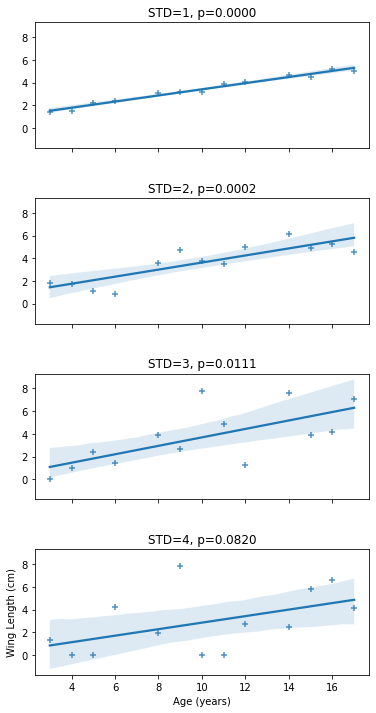

In [8]:
# Loop through noise levels
NUM_STD = 4

# Set up figure with subplots
fig, axs = plt.subplots(NUM_STD, 1, figsize=(6, 12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4)

for nn in np.arange(NUM_STD):
    
    # add Gaussian noise to the observations
    new_lengths = np.maximum(0, list(map(add, wing_length, np.random.normal(0,nn,len(wing_length)))))
    
    # Get stats using scipy
    slope, intercept, r, p, sem = st.linregress(age, new_lengths)
    
    # Plot using Seaborn
    plt.axes(axs[nn])
    sns.regplot(x=age, y=new_lengths, marker='+')
    plt.title(f'STD={nn+1:d}, p={p:.4f}')

plt.xlabel('Age (years)');
plt.ylabel('Wing Length (cm)');
    

# Additional Resources


- Differences between correlation and regression are discussed [here](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression) and [here](http://www.biostathandbook.com/linearregression.html).

- Fun applets are [here](https://www.desmos.com/calculator/jwquvmikhr) and [here](http://www.shodor.org/interactivate/activities/Regression/).

- Working with linear regression in [Matlab](https://www.mathworks.com/help/matlab/data_analysis/linear-regression.html), [R](https://www.tutorialspoint.com/r/r_linear_regression.htm), and [Python](https://realpython.com/linear-regression-in-python/).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania